## Decision Tree - Regression

In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.style.use('classic')
sns.set_style("white")

In [41]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [42]:
df.shape

(301, 9)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [44]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


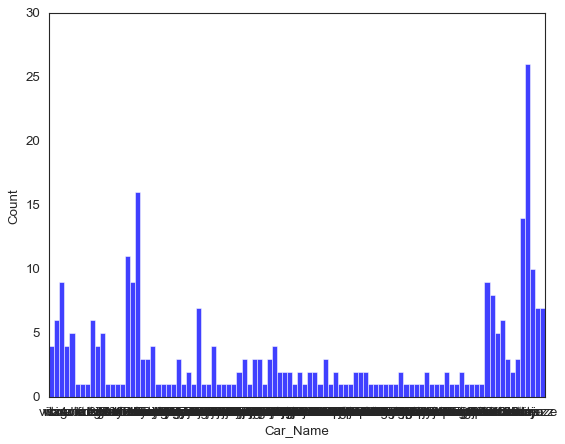

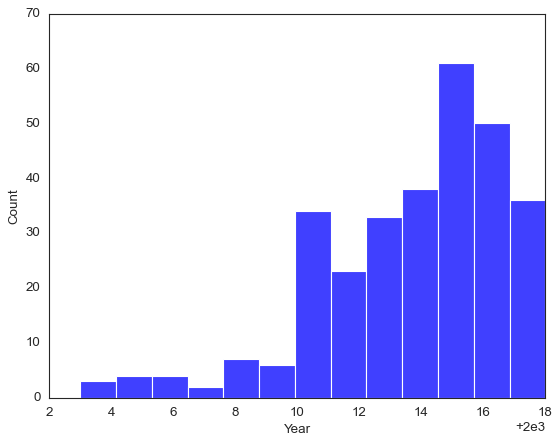

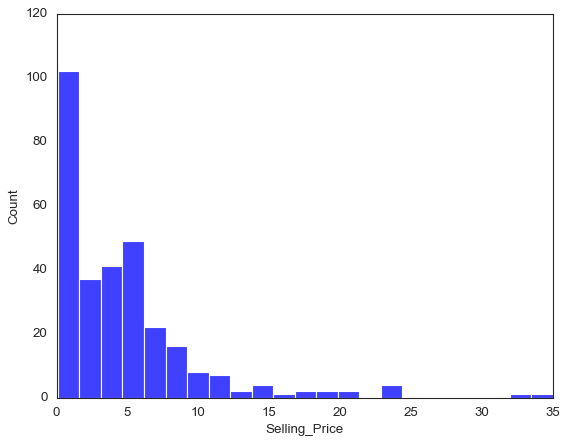

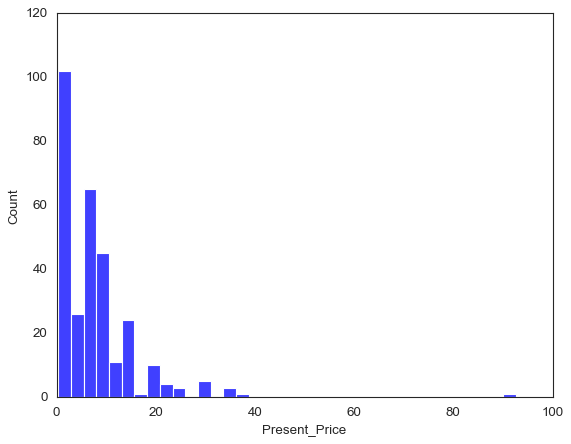

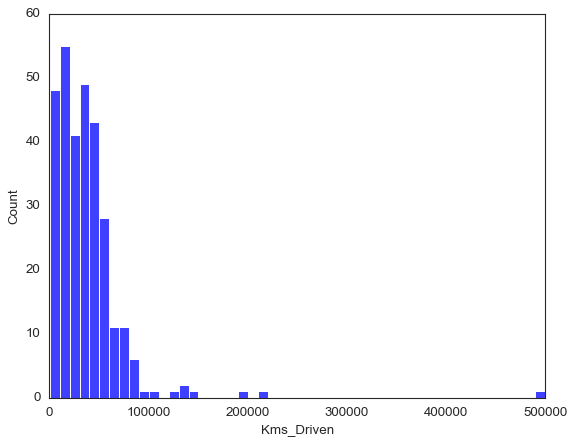

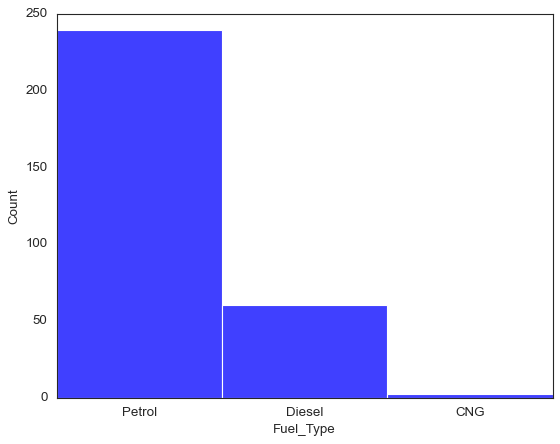

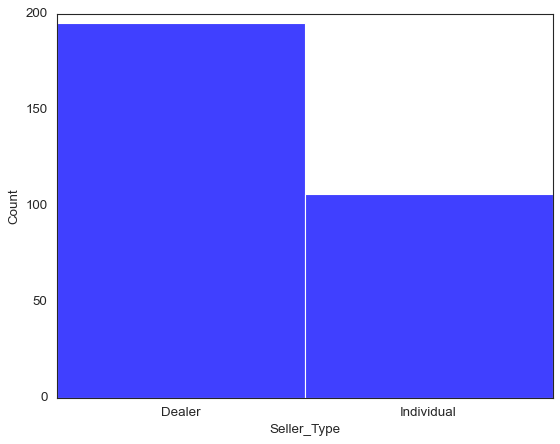

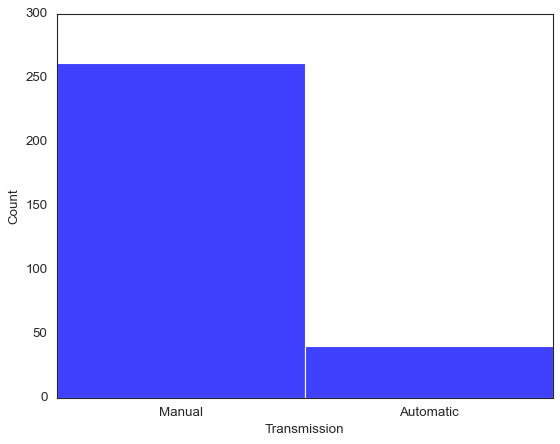

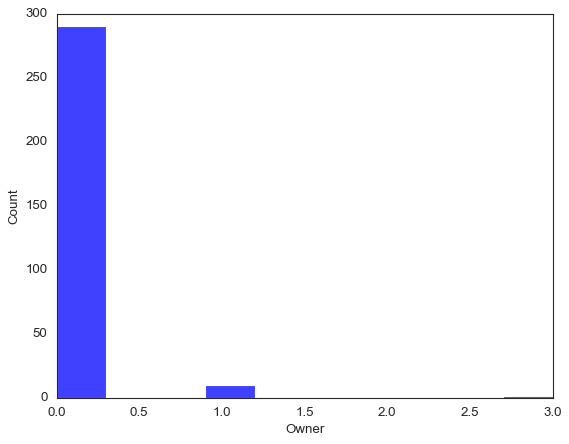

In [46]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

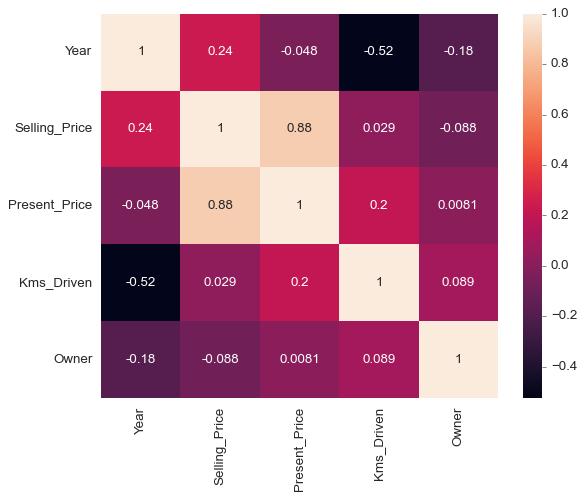

In [47]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [48]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [49]:
df["vehicle_age"] = 2021 - df.Year

In [50]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [51]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [52]:
df=pd.get_dummies(df, drop_first=True)

In [53]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,vehicle_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


## Train test split

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


## Modeling

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
DT_model = DecisionTreeRegressor(random_state=101)

In [59]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=101)

In [60]:
y_pred = DT_model.predict(X_test)
y_train_pred = DT_model.predict(X_train)

In [61]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [62]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"R2" : r2_score(y_train, y_train_pred),
                            "mae" : mean_absolute_error(y_train, y_train_pred),
                            "mse" : mean_squared_error(y_train, y_train_pred),                          
                            "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
            
              "test_set": {"R2" : r2_score(y_test, y_pred),
                           "mae" : mean_absolute_error(y_test, y_pred),
                           "mse" : mean_squared_error(y_test, y_pred),
                           "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [63]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,1.0,0.942589
mae,0.0,0.704754
mse,0.0,1.540966
rmse,0.0,1.241356


In [64]:
from sklearn.model_selection import cross_validate, cross_val_score

model = DecisionTreeRegressor(random_state=101)

scores = cross_validate(model,X_train,y_train,scoring=['r2',
                                                       'neg_mean_absolute_error',
                                                       'neg_mean_squared_error',
                                                       'neg_root_mean_squared_error'],
                                                       cv =5)

pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.006993,0.005001,0.871776,-0.819792,-1.458148,-1.207538
1,0.005001,0.004001,0.931908,-0.707500,-1.622442,-1.273751
2,0.007004,0.003996,0.747815,-1.015417,-6.228746,-2.495746
3,0.007999,0.004007,0.898099,-1.001875,-3.553990,-1.885203
4,0.004001,0.005994,0.957551,-0.597292,-1.367460,-1.169385


In [65]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.881430
test_neg_mean_absolute_error       -0.828375
test_neg_mean_squared_error        -2.846157
test_neg_root_mean_squared_error   -1.606324
dtype: float64

In [66]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,1.0,0.942589
mae,0.0,0.704754
mse,0.0,1.540966
rmse,0.0,1.241356


## Visualizing trees

In [67]:
from sklearn.tree import plot_tree

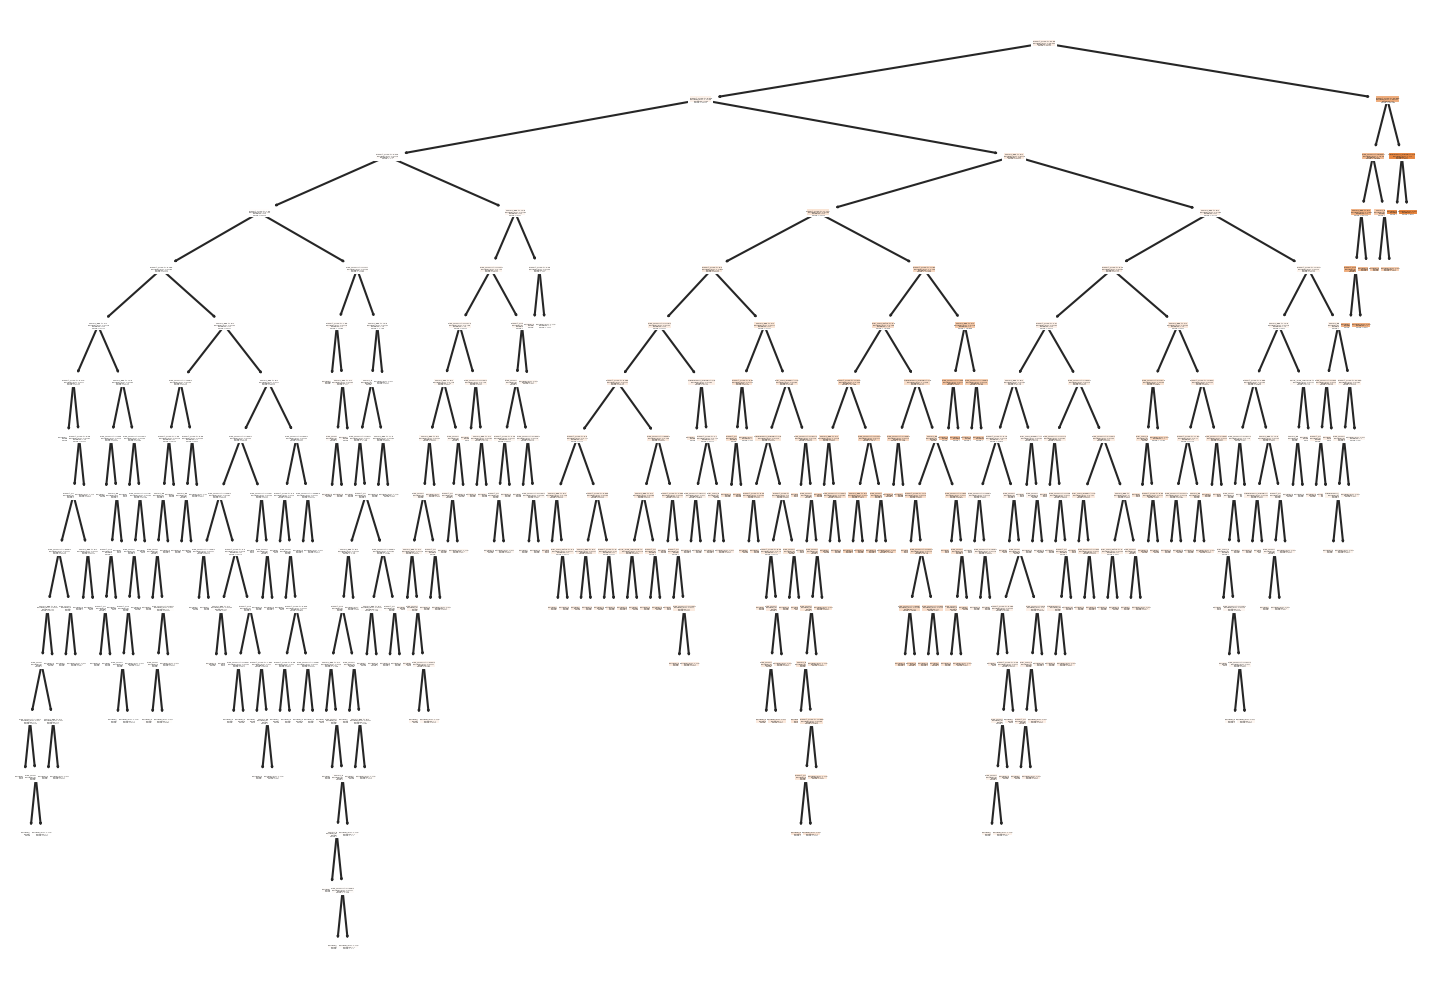

In [68]:
plt.figure(figsize=(12, 8), dpi=150)
plot_tree(DT_model, filled=True, feature_names = X.columns);

In [69]:
def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(y_train, y_train_pred, y_test, y_pred))
    print('\n')
    plt.figure(figsize=(12,8),dpi=300)
    plot_tree(model, filled=True, feature_names = X.columns);

In [70]:
pruned_tree = DecisionTreeRegressor(max_depth=6, random_state=101, min_samples_split=7)
pruned_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_split=7, random_state=101)



      train_set  test_set
R2     0.971356  0.930021
mae    0.481615  0.738078
mse    0.728537  1.878304
rmse   0.853544  1.370512




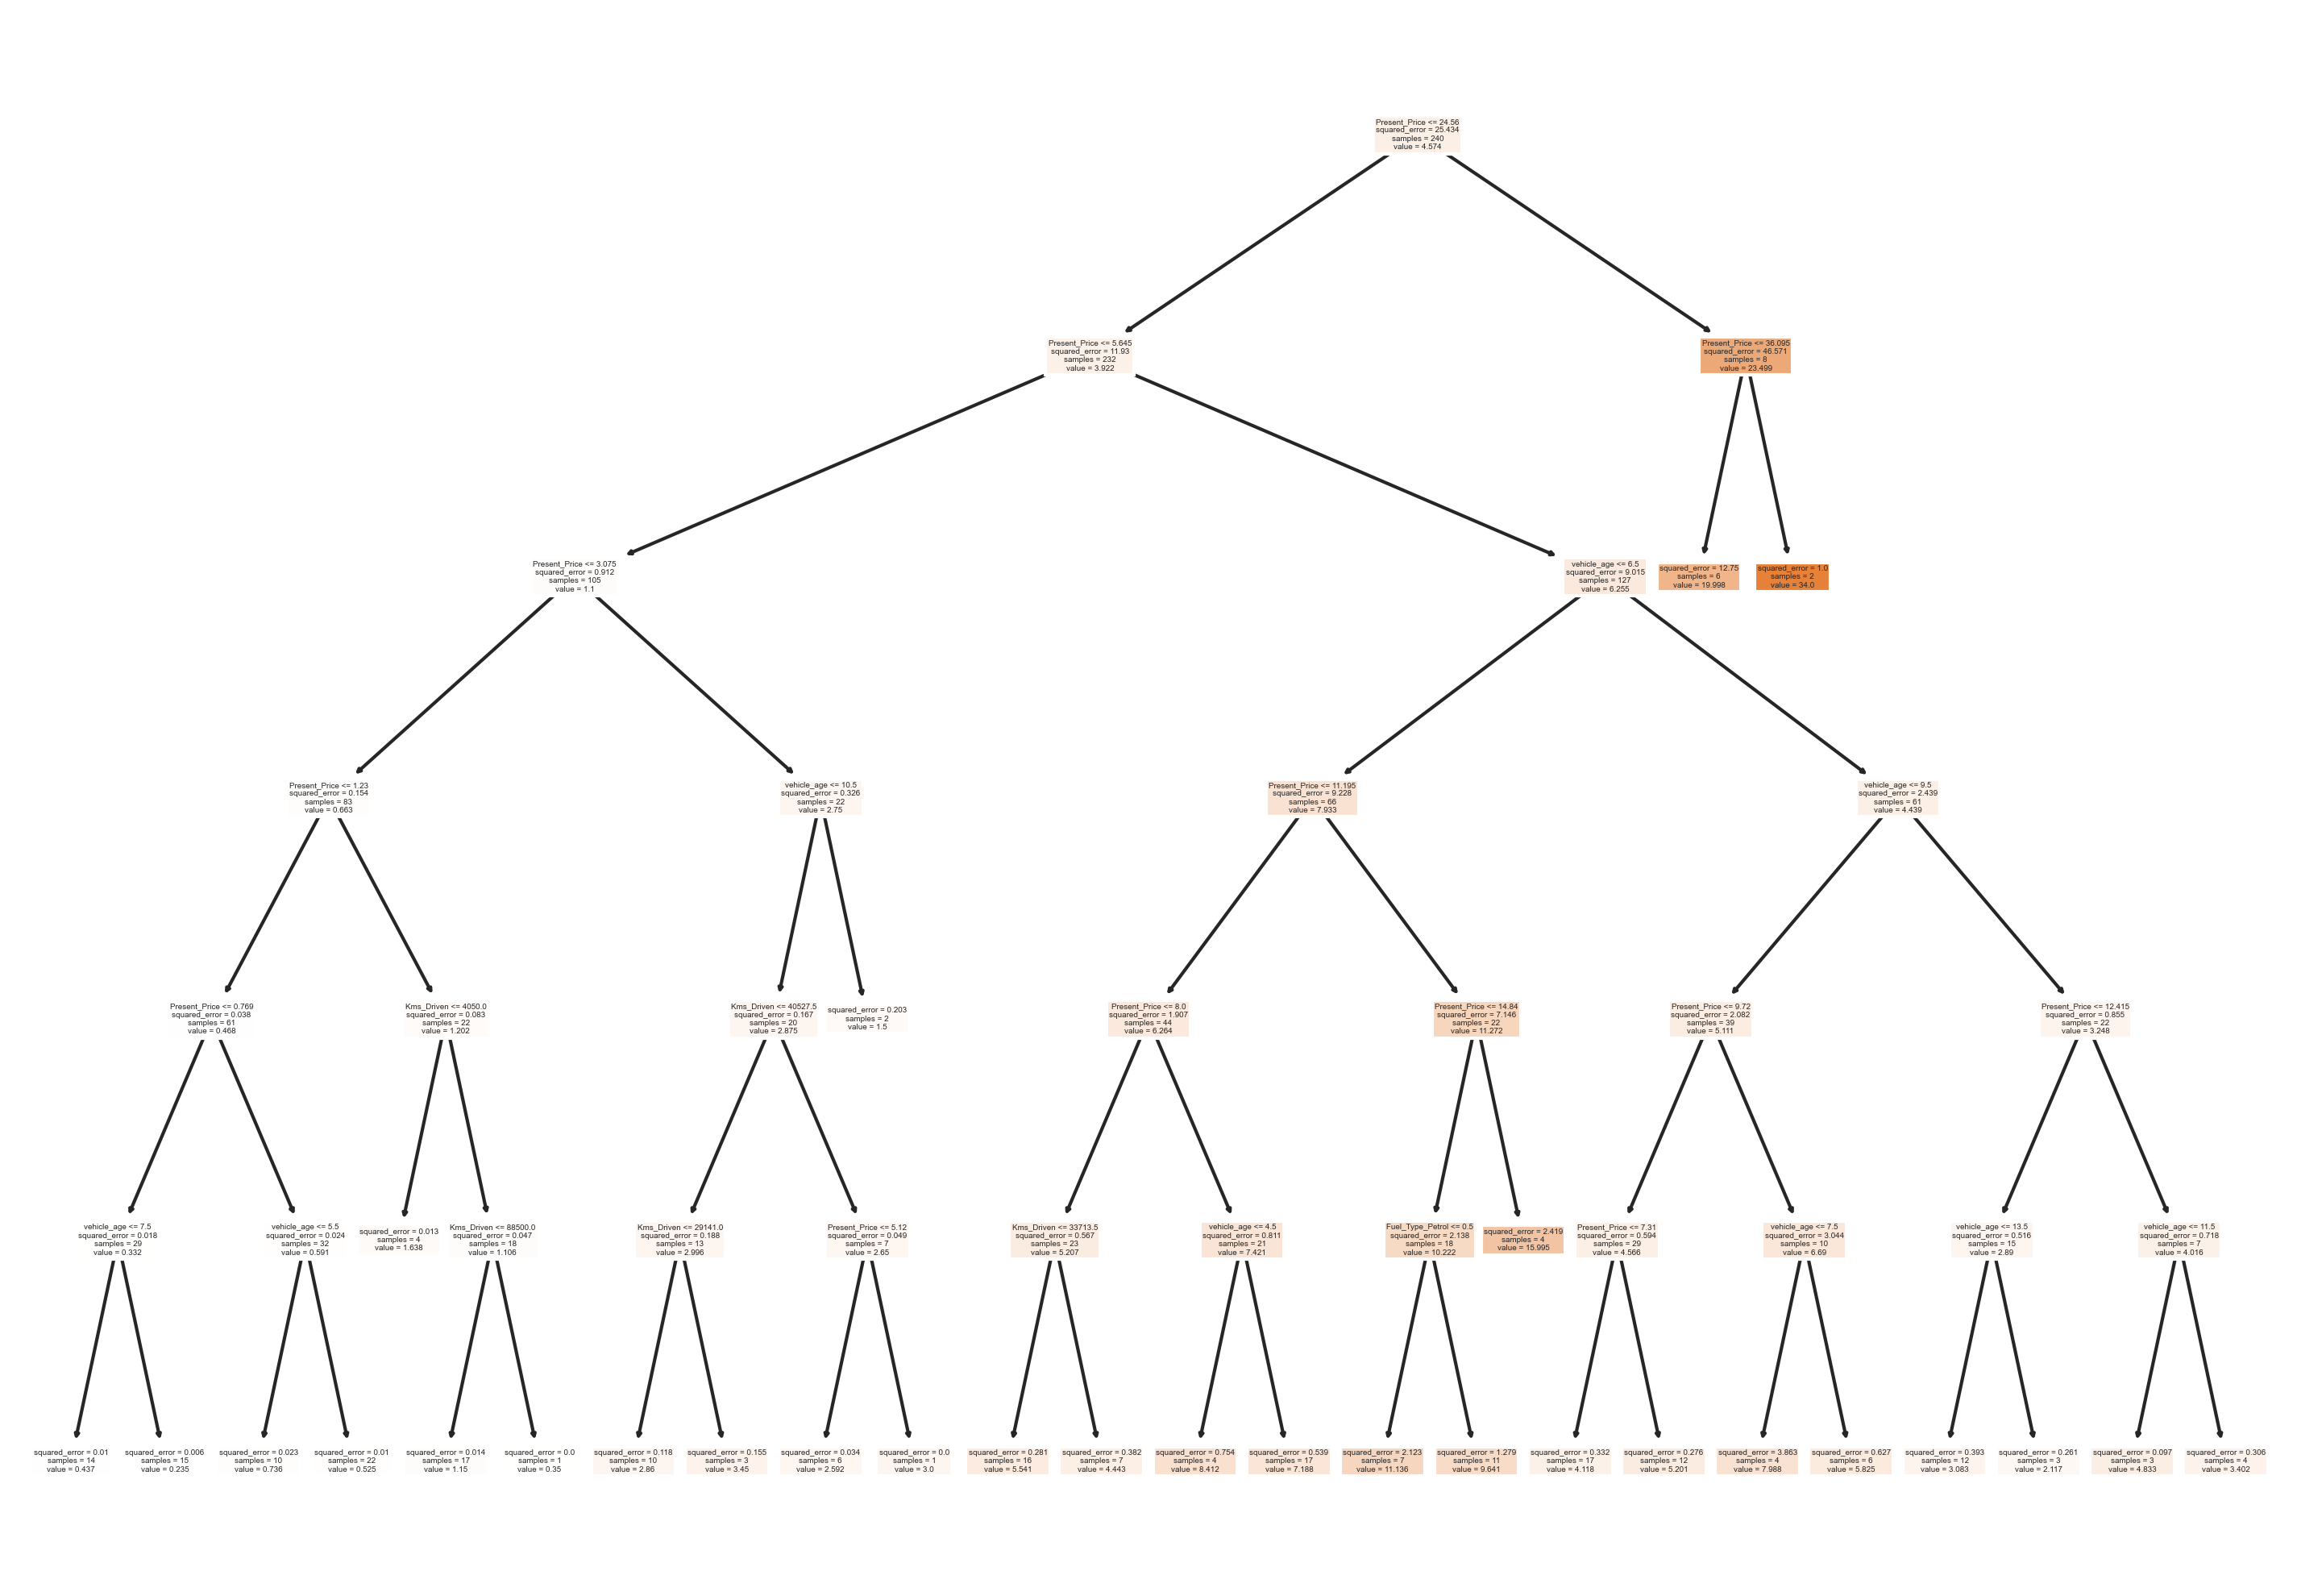

In [71]:
report_model(pruned_tree)

## GridSearch

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
model = DecisionTreeRegressor(random_state=101)

In [74]:
param_grid = {"splitter":["best", "random"],
              "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7],
              "min_samples_split": [2, 3, 5, 6, 7, 8, 9]}

In [75]:

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [76]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='neg_root_mean_squared_error')

In [77]:
grid_model.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_split=7, random_state=101)

In [78]:
grid_model.best_params_

{'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'splitter': 'best'}

In [79]:
grid_score =pd.DataFrame(grid_model.cv_results_)
grid_score.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007499,0.002246,0.012793,0.017918,None,1,2,best,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.884873,-1.109968,-1.560195,-0.768519,-3.661578,-0.855804,-2.462645,-1.135945,-1.340881,-0.923418,-1.470383,0.869760,9
1,0.012000,0.014970,0.009698,0.018809,None,1,2,random,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.923490,-0.775427,-3.512334,-1.591926,-2.145708,-1.001497,-3.557253,-0.841655,-0.398649,-6.202618,-2.095056,1.733007,431
2,0.022676,0.024730,0.005500,0.003233,None,1,3,best,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.868025,-1.166010,-1.555224,-0.764768,-3.669531,-0.893783,-2.493841,-1.150770,-1.381815,-0.907673,-1.485144,0.871849,12
3,0.010256,0.011391,0.007100,0.011364,None,1,3,random,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-6.897430,-1.142804,-2.705761,-1.125360,-2.567831,-2.175479,-3.904847,-0.828821,-0.997053,-4.238386,-2.658377,1.817077,711
4,0.015073,0.018907,0.007999,0.013356,None,1,5,best,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.784587,-1.059755,-2.109169,-0.744268,-3.660894,-0.962344,-2.662130,-1.065130,-1.322418,-0.917490,-1.528818,0.922420,15


In [80]:
grid_model.best_index_

302

In [81]:
grid_model.best_score_

-1.4096661789372227

In [82]:
y_train_pred = grid_model.predict(X_train)

In [83]:
y_pred = grid_model.predict(X_test)

In [84]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.971356,0.930021
mae,0.481615,0.738078
mse,0.728537,1.878304
rmse,0.853544,1.370512


In [85]:
from sklearn.model_selection import cross_validate, cross_val_score

model = DecisionTreeRegressor(random_state=101, max_depth=6, min_samples_split=2)

scores = cross_validate(model, X_train, y_train, scoring=['r2',
                                                          'neg_mean_absolute_error',
                                                          'neg_mean_squared_error',
                                                          'neg_root_mean_squared_error'],
                                                          cv =10)

pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.008571,0.006057,0.959892,-0.538898,-0.463179,-0.680573
1,0.004995,0.006952,0.886540,-0.749800,-1.240498,-1.113776
2,0.003998,0.005001,0.916076,-0.938230,-2.740365,-1.655405
3,0.008337,0.004999,0.944924,-0.542735,-0.684456,-0.827319
4,0.007002,0.051244,0.659354,-1.476792,-11.481774,-3.388477
5,0.005001,0.004004,0.963601,-0.458411,-0.526473,-0.725585
6,0.011703,0.012854,0.893041,-1.243723,-6.330184,-2.515986
7,0.005005,0.008693,0.870195,-0.645394,-1.092579,-1.045265
8,0.010922,0.004003,0.887375,-0.577041,-1.373038,-1.171767
9,0.008999,0.004999,0.978598,-0.675981,-1.061438,-1.030261


In [86]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.895960
test_neg_mean_absolute_error       -0.784700
test_neg_mean_squared_error        -2.699398
test_neg_root_mean_squared_error   -1.415441
dtype: float64

In [87]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.971356,0.930021
mae,0.481615,0.738078
mse,0.728537,1.878304
rmse,0.853544,1.370512


In [88]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [89]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
60,6.95,5.825000,1.125000
117,1.10,1.150000,-0.050000
282,8.25,7.987500,0.262500
234,5.50,5.540625,-0.040625
266,3.65,4.117647,-0.467647
90,3.80,3.402500,0.397500
62,18.75,19.998333,-1.248333
48,5.80,5.540625,0.259375
106,1.35,2.860000,-1.510000
49,7.75,8.412500,-0.662500


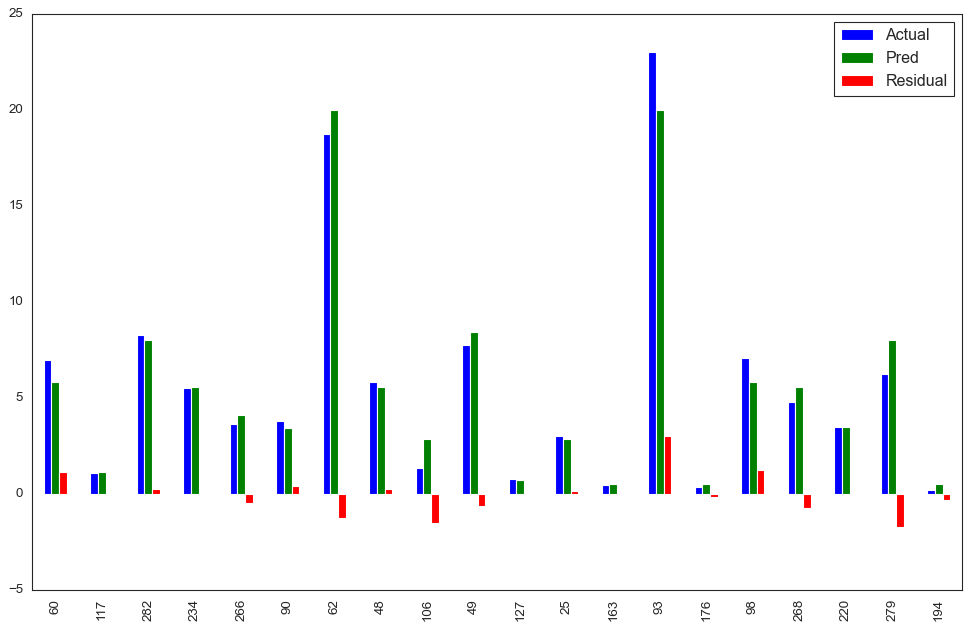

In [90]:
comp_sample.plot(kind='bar', figsize=(15,9))
plt.show()